### import packages

In [3]:
import pandas as pd
#import geopandas as gpd
import time
import datetime
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
sns.set()

### import data 

In [4]:
PATH = 'dataset/results.csv'
GEO_PATH = 'dataset/ne_10m_admin_0_countries_lakes.shp'
def load_data(path = PATH):
    return pd.read_csv(path)
def load_world_map(path = GEO_PATH): 
    shapefile = os.path.expanduser(GEO_PATH)
    return gpd.read_file(shapefile)[['ADMIN','geometry']].to_crs('+proj=robin')

     

In [5]:
data = load_data()
data.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/results.csv'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41243 entries, 0 to 41242
Data columns (total 9 columns):
date          41243 non-null object
home_team     41243 non-null object
away_team     41243 non-null object
home_score    41243 non-null int64
away_score    41243 non-null int64
tournament    41243 non-null object
city          41243 non-null object
country       41243 non-null object
neutral       41243 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [5]:
data.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

خب همین جوری که مشاهده میکنیم هیچ داده ی
پوچی
وجود دارد نداره پس نیاز به تمیز کردن داده نداریم




In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
home_score,41243.0,1.744975,1.750513,0.0,1.0,1.0,2.0,31.0
away_score,41243.0,1.189317,1.406648,0.0,0.0,1.0,2.0,21.0


In [7]:
data['timestamp'] = data['date'].map(lambda x: time.mktime(datetime.datetime.strptime(x , '%Y-%m-%d').timetuple()))

برای راحتی تاریخ رو به فرمت
تیام استریپ
درمیاوریم تا راحت تر بتونیم باهاش کار کنیم

### sort team by first time enjoy in football

In [8]:
data['year'] = data['date'].map(lambda x: x.split('-')[0])

In [9]:
teams_first_seen = {}
for index, row in data.iterrows():
    if row['home_team'] not in teams_first_seen:
        teams_first_seen[row['home_team']] = int(row['year'])
    if row['away_team'] not in teams_first_seen:
        teams_first_seen[row['away_team']] = int(row['year'])

##### table nom 1

In [10]:
teams_first_seen = pd.DataFrame.from_dict({'teams': list(teams_first_seen.keys()), 'seen_year': list(teams_first_seen.values())})
teams_first_seen.head(20)

,teams,seen_year
0,Scotland,1872
1,England,1872
2,Wales,1876
3,Northern Ireland,1882
4,United States,1885
5,Canada,1885
6,Uruguay,1902
7,Argentina,1902
8,Austria,1902
9,Hungary,1902


ما اومدیم کشورهایی که تیم ملی فوتبال دادند رو براساس تاریخی که تیم ملی دادند مرتب کردیم تا اولین کشورهایی که تمی ملی فوتبال خودشون رو معرفی کردن رو پیدا کنیم … طبق نتایجی که به دست اومد تیم های ملی اسکاتلند
 و تیم ملی انگلستان
  در سال ۱۸۷۲ اولین کشورهایی بودند که تیم ملی فوتبال داشتند و نکته جالب اینه که تا سال ۱۸۷۶ یعنی ۴ سال بعد هیچ کشوری تیم ملی فوتبال نداشت به جز این اسکاتلند و انگلستان و تا سال ۱۸۷۶ هر سال یک مسابقه بین این دو کشور برقرار میشد تا این که در سال ۱۸۷۶ کشور ولز
   سومین کشوری بود که تیم ملی فوتبال خودش رو معرفی کرد .
   
 کشور خودمون هم ایران در جنگ جهانی دوم  در سال ۱۹۴۱ تیم ملی فوتبال خودش رو معرفی کرد و ۹۵ امین کشوری هست که به فوتبال پیوست

Fact: Iran join to football match in World War 2

In [11]:
data[data.year == '1872']

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,timestamp,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,-3.063756e+09,1872


### finde changing geopolitics 

In [12]:
len(data['timestamp'].unique())

15154

In [13]:
geo_data = load_world_map()

In [14]:
len(teams_first_seen)

314

In [15]:
len(geo_data)

255

در کل جهان ۲۵۵ کشور داریم در حالی که در لیست مسابقاتی که برگزار شده با بررسی هایی که انجام دادیم تعداد ۳۱۴ کشور موجود است که نشان دهنده این است که تعدادی از کشور های قبلا وجود داشته اند و بنا به دلایل مختلفی از بین رفتند یا تجزیه شدند یا به کشورهای دیگری ملحق شدند .

/home/hossein/applications/anaconda3/envs/1/lib/python3.7/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


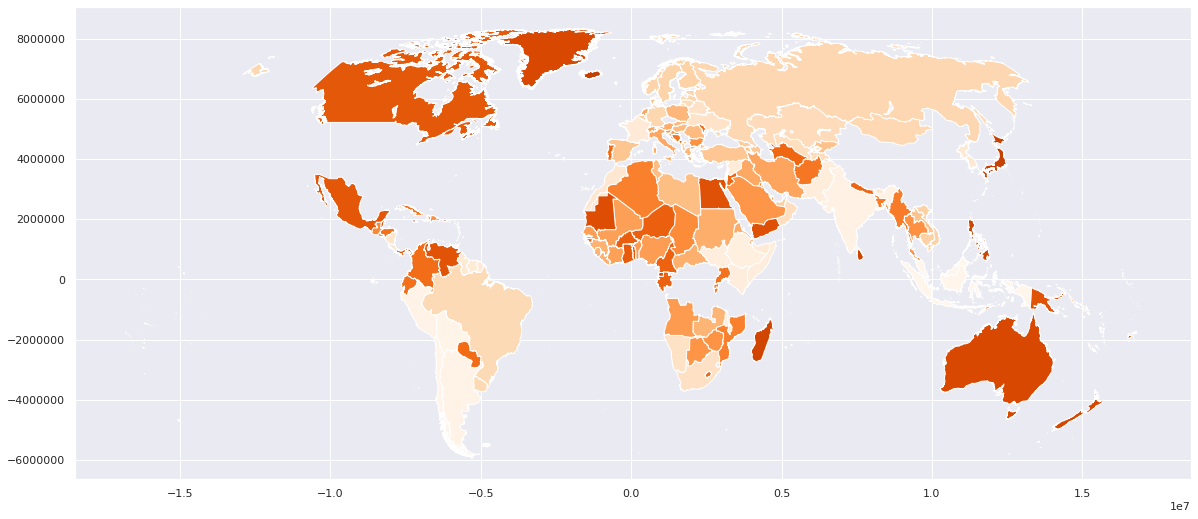

In [16]:
geo_map = geo_data.merge(teams_first_seen, left_on='ADMIN', right_on='teams')
ax = geo_map.dropna().plot(cmap='Oranges', figsize=(20,15), k=['teams','seen_year'], legend=True, column='seen_year', color='#fefefe')

این نمودار هم هیپ مپ کشورها رو براساس تاریخی که به قوتبال پیوستند نشون میده

### plot frequency of national football competition in years

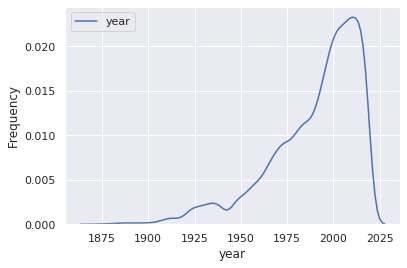

In [17]:
plt.figsize=(20,18)
sns.kdeplot(data.year)
plt.xlabel('year')
plt.ylabel('Frequency')
plt.show()

این نمودار هم روند برگزاری مسابقات فوتبال در سطح ملی در سال های مختلف رو نشون میده که روند که از سال ۱۸۷۶ سالی که اولین کشور ها به فوتبال پیوستند هواره  سیر صعودی داشته فقط در یک بازه سیر نزولی داشته اون قبل از سال ۱۹۵۰ بوده که  که علت اون رو هم میتوان جنگ جهانی دوم دانست بین سال های ۱۹۳۹ تا ۱۹۴۴ رخ داده و دقیقا در این بازه بوده که سیر بازی فوتبال نزولی بوده و از آن سال به بعد یعنی از سال ۱۹۴۵ سیر صعودی فوتبال نیز افزایش بیشتری پیدا کرد 


در نمودار بعد هم همین نمودار فقط برای مودش  رو نشون میدهد که طبق اون روند برگزاری مسابقات در بین سال های ۱۹۷۰ تا ۲۰۱۲ بیشترین سیر صعودی برگزاری مسابقات در سطح ملی رو دارد . 

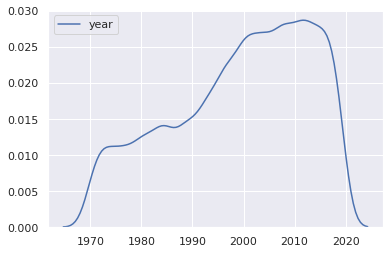

In [18]:
sns.kdeplot(data[data.timestamp>int(data['year'].mode())]['year'])

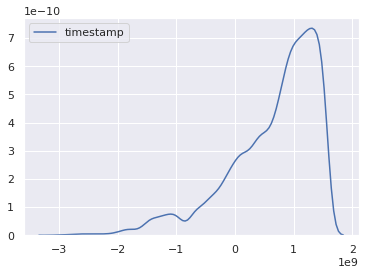

In [19]:
sns.kdeplot(data['timestamp'])

In [20]:
datetime.datetime.fromtimestamp(data['timestamp'].mode()).strftime('%Y-%m-%d')

'2012-02-29'

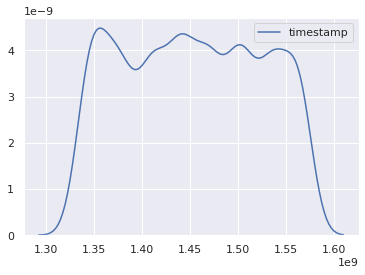

In [21]:
sns.kdeplot(data[data.timestamp>int(data['timestamp'].mode())]['timestamp'])

In [22]:
# teams_first_seen.teams.not_in(geo_data.ADMIN.values)

In [23]:
# changed_country = teams_first_seen[teams_first_seen["teams"] != geo_data["ADMIN"]]
# changed_country.head()


### Most countries that host most of football match

In [24]:
hosts = {}
for index, row in data.iterrows():
    if row['country'] not in hosts:
        hosts[row['country']] = 0
    hosts[row['country']] += 1

In [25]:
hosts = pd.DataFrame.from_dict({'country': list(hosts.keys()), 'host_match': list(hosts.values())})

##### table  nom 2

In [26]:
hosts = hosts.sort_values(by=['host_match'], ascending=False)
hosts.head(20)

,country,host_match
4,United States,1154
10,France,805
1,England,689
158,Malaysia,646
14,Sweden,639
15,Germany,583
25,Brazil,529
23,Spain,521
146,Thailand,484
16,Italy,481


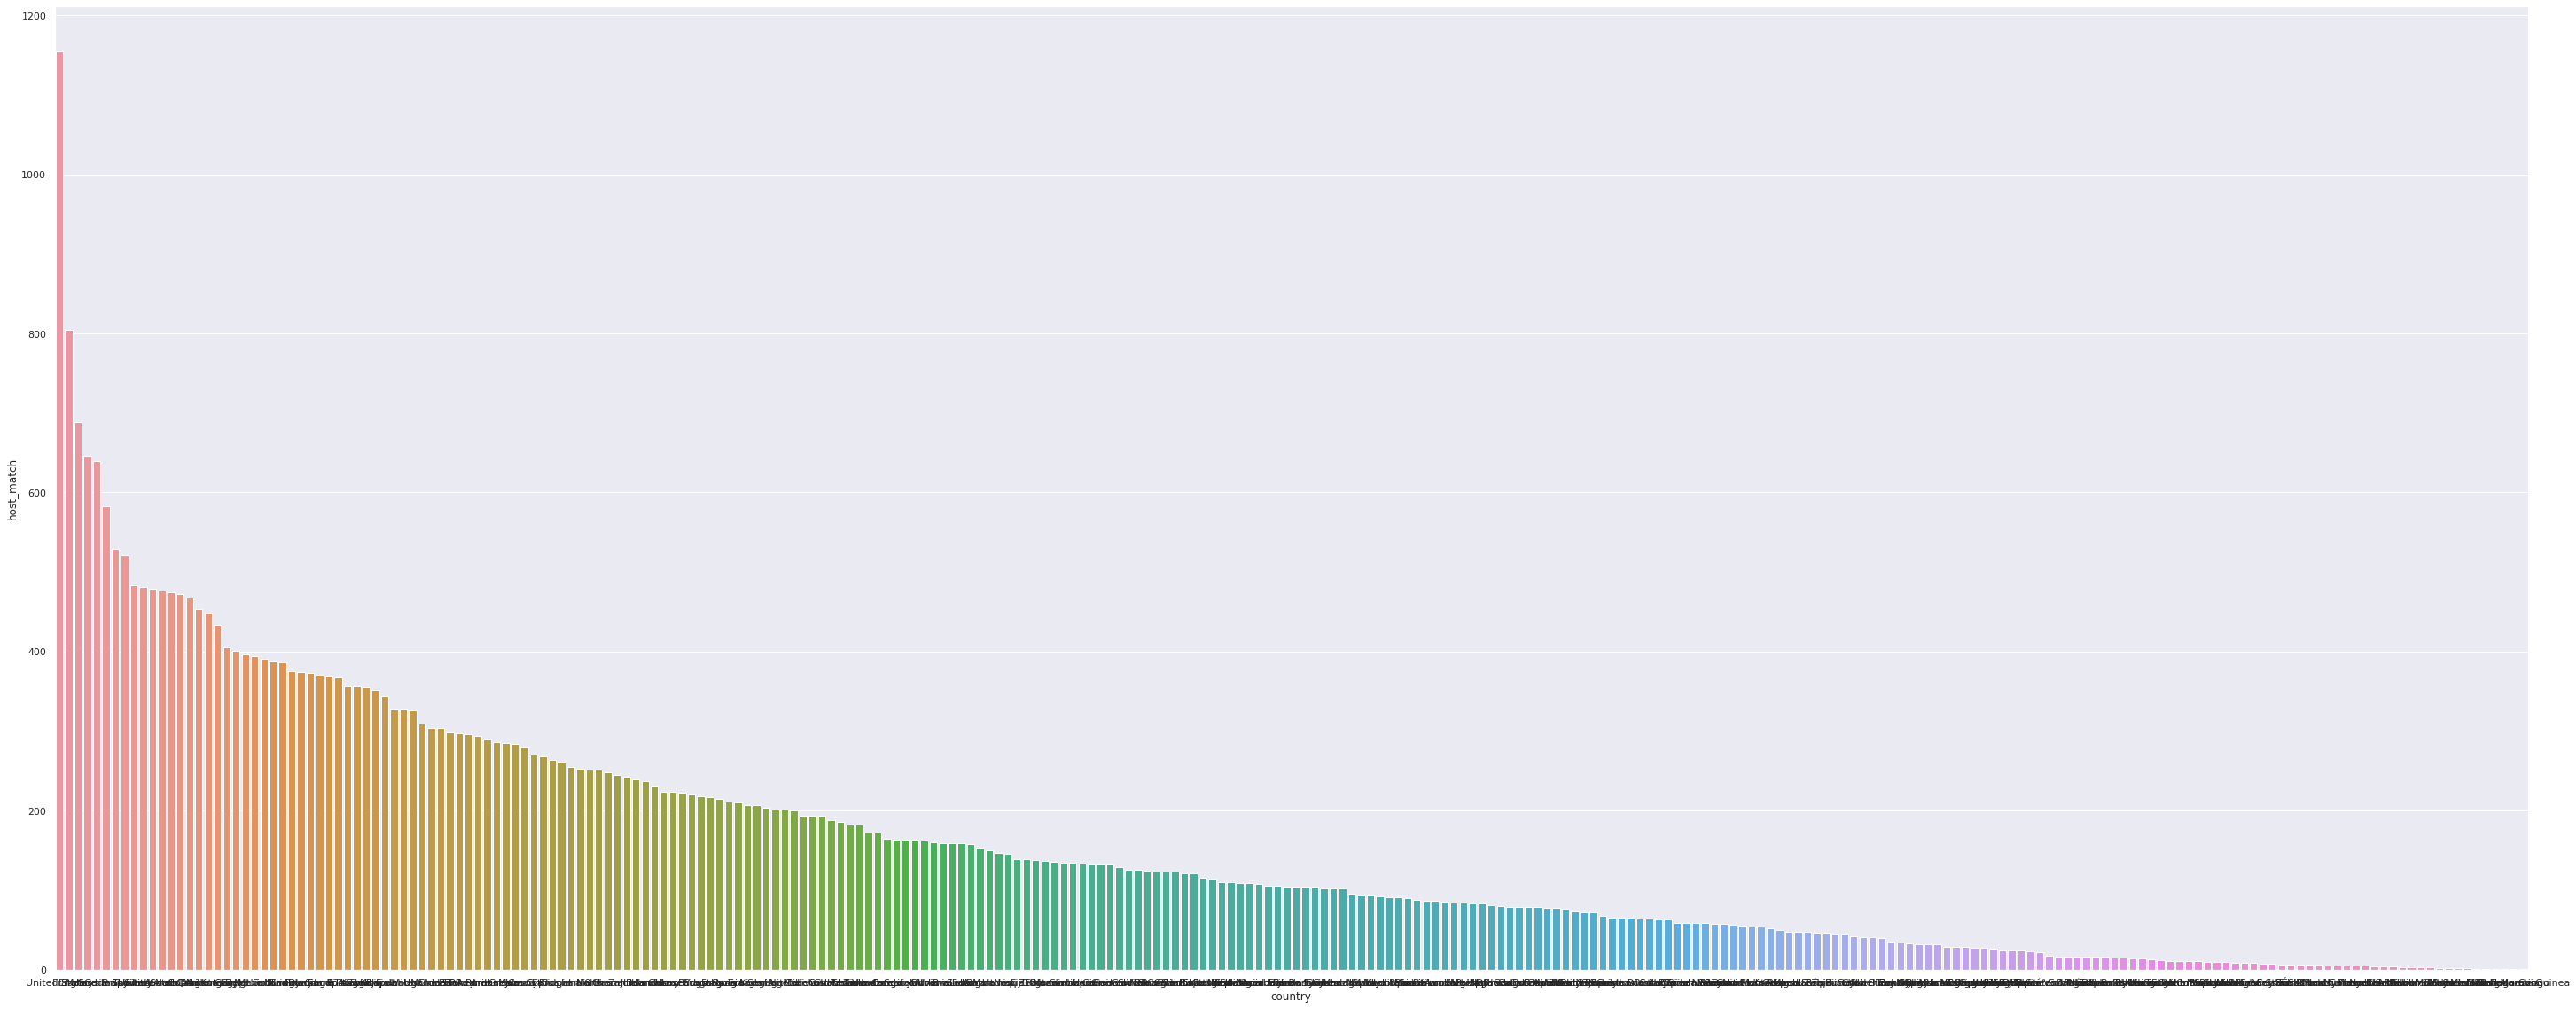

In [27]:
plt.figure(figsize=(50, 20))
sns.barplot(x='country', y='host_match', data=hosts[:])
plt.show()

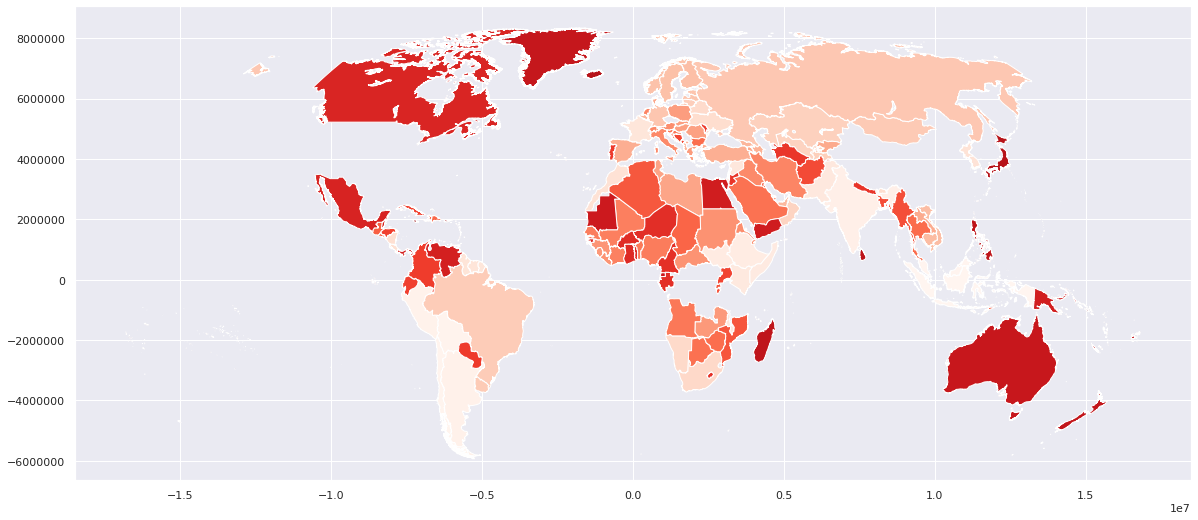

In [28]:
geo_map = geo_data.merge(hosts, left_on='ADMIN', right_on='country')
ax = geo_map.dropna().plot(cmap='Reds', figsize=(20,16), k=['country','host_match'], legend=True, column='host_match', color='#fefefe')

کار بعدی که انجام دادیم این بود که اومدیم بنیم کدوم کشور ها بیشترین میزبانی از مسابقات رو داشتند طبق جدول شماره ۲ که  در بالامشاهدی می کیند کشورهای امریکا 
فرانسه و انگلستان
بیشترین میزبانی از مسابقات فوتبال رو در سطح ملی رو داشتند .

نمودار های بالا هم به ترتیب نمودار میله ای کشور ها بر اساس بیشترین میزبانی که انجام دادن و نمودار دوم هم نمودار هیت مپ آن است

### Most countries that host other teams competitions

In [29]:
host_dont_practice_in = {}
for index, row in data.iterrows():
    if row['country'] not in host_dont_practice_in:
        host_dont_practice_in[row['country']] = 0
    if row['country'] != row['home_team'] and row['country'] != row['away_team']:
        host_dont_practice_in[row['country']] += 1

In [30]:
host_dont_practice_in = pd.DataFrame.from_dict({'country': list(host_dont_practice_in.keys()), 'host_match': list(host_dont_practice_in.values())})

#### table nom 3

In [31]:
host_dont_practice_in = host_dont_practice_in.sort_values(by=['host_match'], ascending=False)
host_dont_practice_in.head(20)

,country,host_match
4,United States,761
158,Malaysia,428
10,France,374
102,South Africa,283
195,United Arab Emirates,257
1,England,250
182,Qatar,227
23,Spain,214
146,Thailand,207
25,Brazil,193


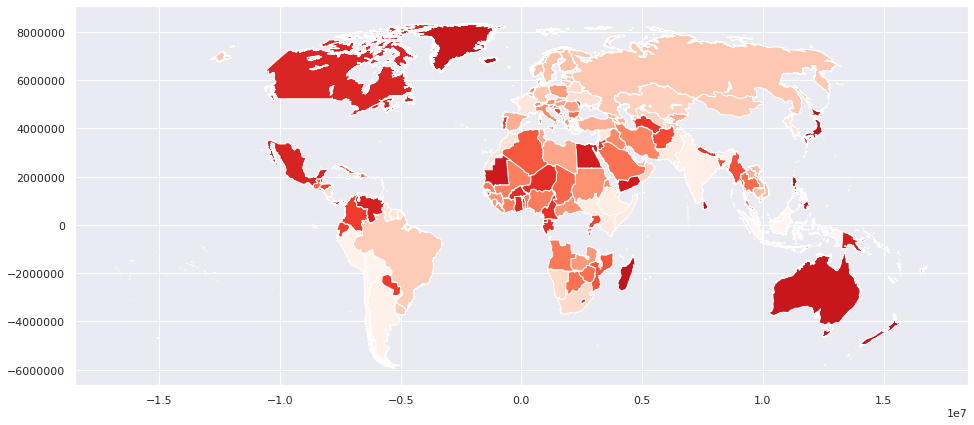

In [32]:
geo_map = geo_data.merge(host_dont_practice_in, left_on='ADMIN', right_on='country')
ax = geo_map.dropna().plot(cmap='Reds', figsize=(16,10), k=['country','host_match'], legend=True, column='host_match', color='#fefefe')

در همین قسمت میزبان ها, اومدیم کشور هایی که میزبان مسبقات دیگر کشور ها بودند که مثلا یا میزبان تورنمتی بودند یا کشور های دیگه برای مسابقات دوستانه خود این کشور ها رو انتخاب کردند  رو مورد بررسی قرار دادیم.

 نکته جالب توجه این جاست که در بین کشور هایی که میزبان مسابقات سایر کشور ها بودند نیز امریکا 
 با ۷۶۱ میزبانی بیشترین میزبانی را دارد و بعد از آن مالزی
  و فرانسه قرار دارد .
  
  
  نمودار بالا هم هیت مپ همین قسمت است  

In [33]:
friendly_match = data[data['tournament'] == 'Friendly']
un_friendly_match = data[data['tournament'] != 'Friendly']

In [34]:
friendly_match['date'].count() / data['date'].count() * 100

41.245787163882355

In [35]:
len(un_friendly_match)

24232

In [36]:
tournaments = un_friendly_match.groupby('tournament')
tournaments['tournament'].count()

tournament
ABCS Tournament                     20
AFC Asian Cup                      370
AFC Asian Cup qualification        724
AFC Challenge Cup                  100
AFC Challenge Cup qualification     92
                                  ... 
Viva World Cup                      56
WAFF Championship                   97
West African Cup                    54
Windward Islands Tournament        101
World Unity Cup                      4
Name: tournament, Length: 111, dtype: int64

کل مسابقات برگزار شده ای در داده های مان موجود است , این مسابقات در قالب ۱۱۲ تورنمنت برگزار شده است که در بین آن ها  مسابقات دوستانه
 با ۴۱ درصد  بیشترین تعداد برگزاری تورنمنت ها رو دارد .


In [37]:
tournaments_score = {}
for name, group in tournaments:
    score_count = 0.0
    match_count = 0.0
    for index,match in group.iterrows(): 
        score_count += match['home_score'] + match['away_score']
        match_count += 1
    tournaments_score[name] = score_count / match_count

tournaments_score = pd.DataFrame.from_dict({'tournament': list(tournaments_score.keys()), 'score_per_match': list(tournaments_score.values())})
tournaments_score.head(2)

,tournament,score_per_match
0,ABCS Tournament,3.700000
1,AFC Asian Cup,2.667568


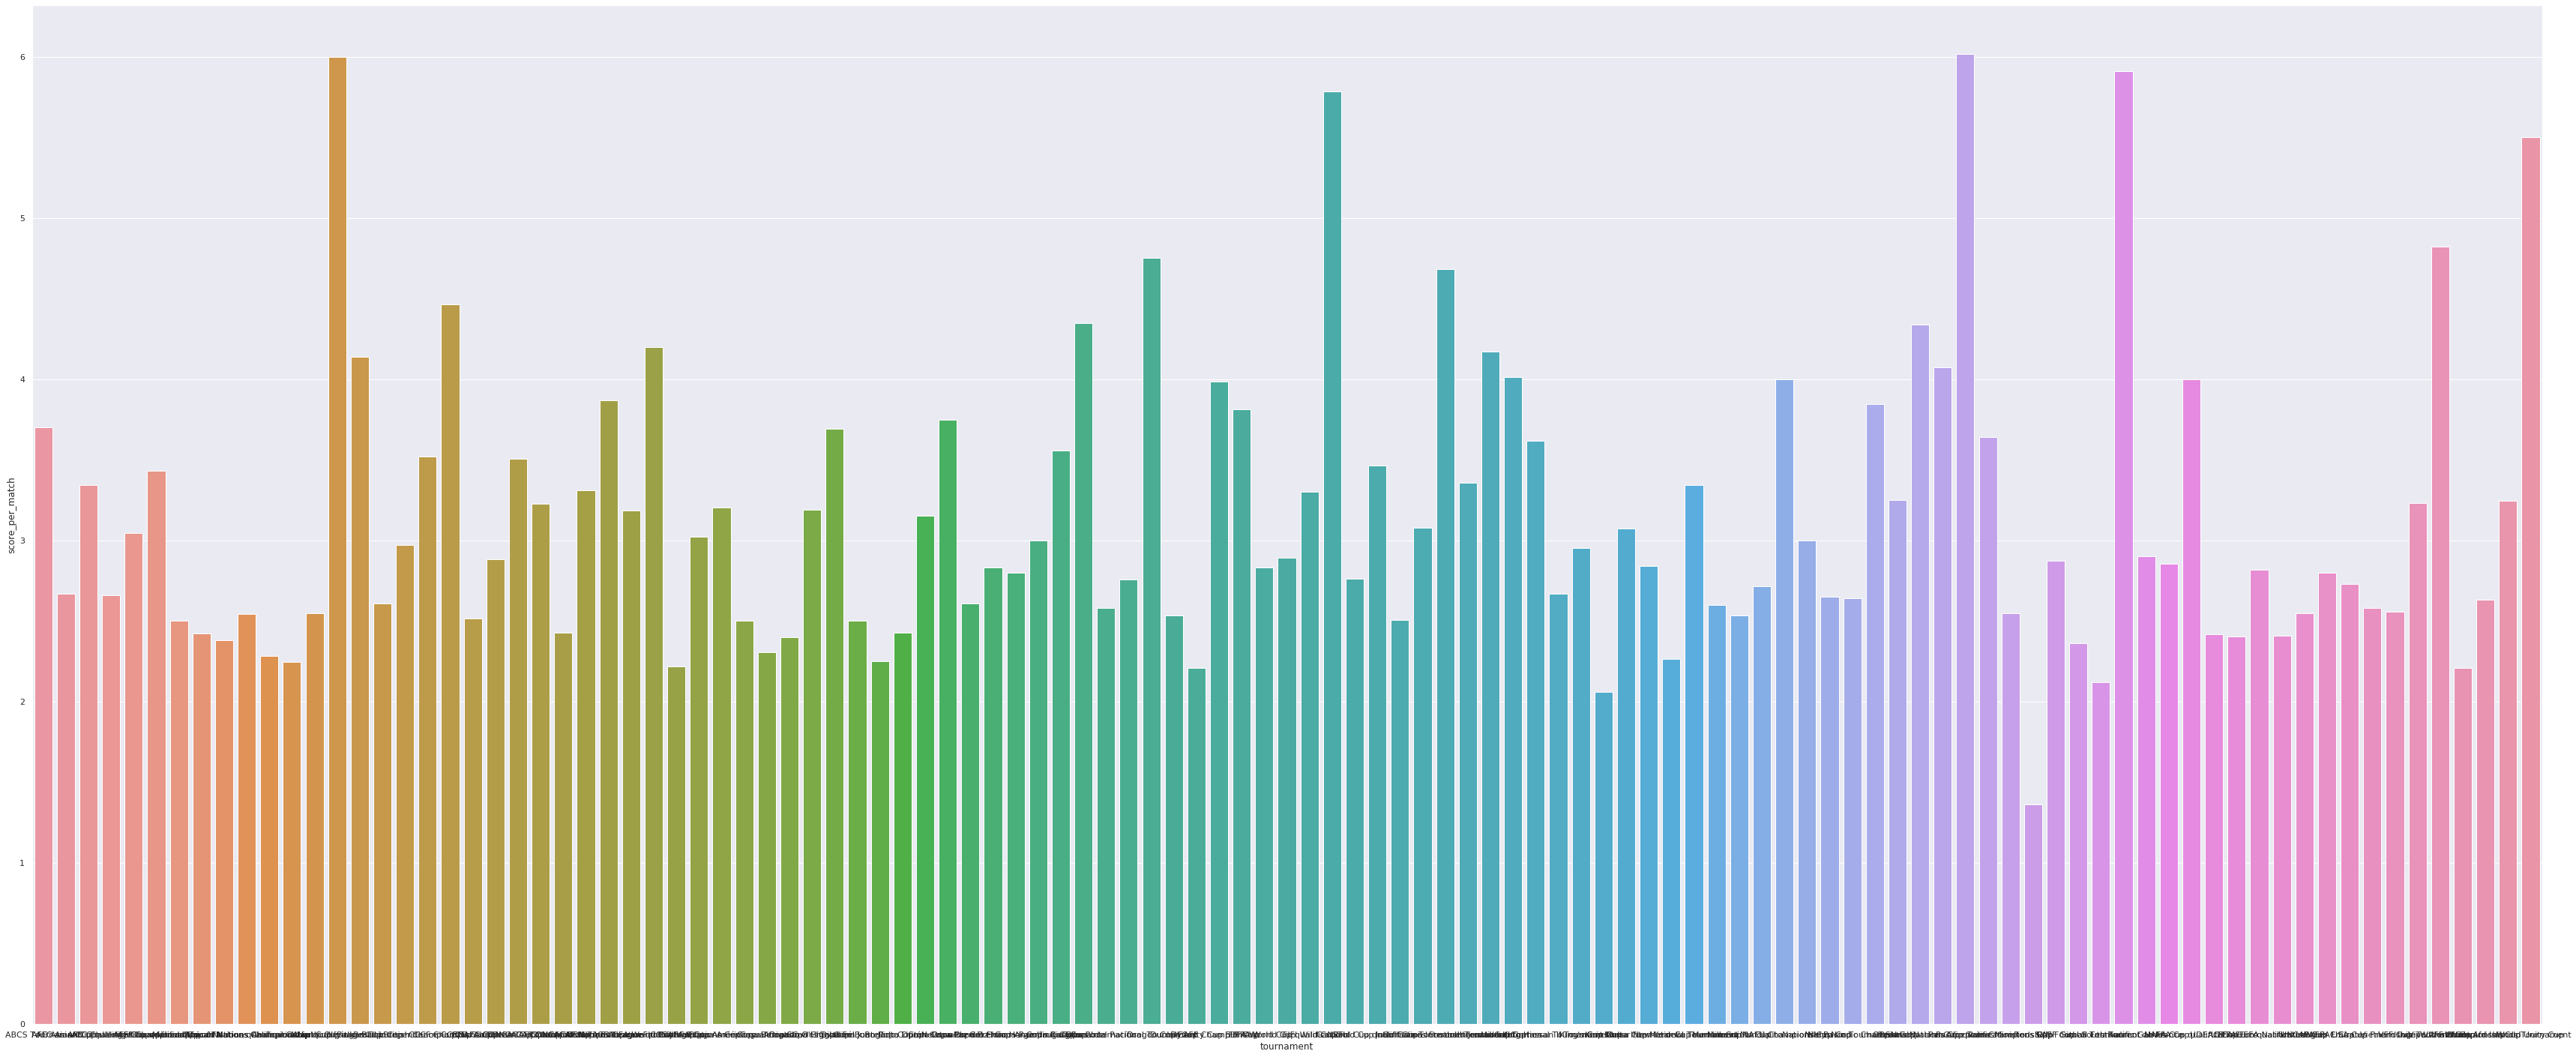

In [38]:
plt.figure(figsize=(60, 25))
# tournaments_score.plot(kind='bar')
sns.barplot(x='tournament',y='score_per_match', data=tournaments_score)
plt.show()

In [39]:
tournaments_score = tournaments_score.sort_values(by=['score_per_match'], ascending=False)
tournaments_score.head()

,tournament,score_per_match
85,Pacific Games,6.019608
13,Atlantic Heritage Cup,6.000000
92,South Pacific Games,5.912195
57,GaNEFo,5.785714
110,World Unity Cup,5.500000


یکی از معیار هایی که در هر تورنمنت در نظر میگیرن مقدار گل زده در هر مسابقه  در اون تورنمنت هست که می تواند نشان دهنده هیجان و جذابیت مسابقات در ان تورنمنت باشد چون هر چه تعداد گل زده در هر مسابقه بیشتر باشد معمولا آن مسابقه جذاب تر ودیدینی تر است . به همین ما برای هر تورنمنت این معیار رو حساب کردیم و نمودار ان را کشیدیم 

## Ranking 

In [40]:
ranking = [dict() for x in range(len(data))]
# ranking = pd.DataFrame(columns=teams_first_seen['teams'].values)
ranking_temp = {}
teams_win_match = {}
for team in teams_first_seen['teams'].values:
    ranking_temp[team] = 0
    teams_win_match[team] = False

In [41]:
win_point = 6
loss_point = -1
i = -1 
for index, row in data.iterrows():
    i += 1
    score_away_team = ranking_temp[row['away_team']]
    score_home_team = ranking_temp[row['home_team']]
    if row['home_score'] == row['away_score']:
        if row['tournament'] != 'Friendly':
            mid = (score_away_team + score_home_team ) / 2
            ranking_temp[row['home_team']] = mid
            ranking_temp[row['away_team']] = mid
        else :
            delta = abs(score_away_team - score_home_team) / win_point
            if score_away_team > score_home_team:
                ranking_temp[row['home_team']] += delta
                ranking_temp[row['away_team']] -= delta
            else :
                ranking_temp[row['home_team']] -= delta
                ranking_temp[row['away_team']] += delta
        ranking[i] = ranking_temp.copy()
        # ranking = ranking.append(pd.Series(ranking_temp.copy()), ignore_index=True)
        continue
    if not teams_win_match[row['home_team']] and row['home_score'] > row['away_score']:
        ranking_temp[row['home_team']] += win_point + ranking_temp[row['away_team']]
        ranking_temp[row['away_team']] += loss_point
        teams_win_match[row['home_team']] = True
        ranking[i] = ranking_temp.copy()
        # ranking = ranking.append(pd.Series(ranking_temp.copy()), ignore_index=True)
        continue
    if not teams_win_match[row['away_team']] and row['away_team'] > row['home_team']:
        ranking_temp[row['away_team']] += win_point + ranking_temp[row['home_team']]
        ranking_temp[row['home_team']] += loss_point
        teams_win_match[row['away_team']] = True
        ranking[i] = ranking_temp.copy()
        # ranking = ranking.append(pd.Series(ranking_temp.copy()), ignore_index=True)
        continue
    if row['home_score'] > row['away_score']:
        ranking_temp[row['home_team']] += win_point
        ranking_temp[row['away_team']] += loss_point
        ranking[i] = ranking_temp.copy()
        # ranking = ranking.append(pd.Series(ranking_temp.copy()), ignore_index=True)
        continue
    if row['home_score'] < row['away_score']:
        ranking_temp[row['away_team']] += win_point
        ranking_temp[row['home_team']] += loss_point
        ranking[i] = ranking_temp.copy()
        # ranking = ranking.append(pd.Series(ranking_temp.copy()), ignore_index=True)
        continue

In [42]:
last_rank = pd.DataFrame.from_dict({'teams': list(ranking_temp.keys()), 'rank': list(ranking_temp.values())})
last_rank = last_rank.sort_values(by=['rank'], ascending=False)
last_rank.head(50)

,teams,rank
11,Belgium,1121.279795
14,Netherlands,1069.773044
15,Germany,1051.457570
18,Italy,1050.822424
46,Mexico,1037.490505
3,Northern Ireland,1031.495196
84,Venezuela,1029.672008
12,France,1028.357122
51,Turkey,1028.357122
7,Argentina,1024.634163


برای رده بندی کشورها سیستمی که نوشتیم این است در هر برشی از تاریخ که بخواهیم میتوانیم رده بندی تا آن تاریخ 
دلخواه انجام دهیم .قوانین رده بندی که پیاده سازی کردیم بدین صورت است :

۱)هر تیمی که برنده مسابقه شود۶ امتیاز مثبت میگیرد اما اگر تیمی که امتیاز پایین تری نسبت به تمی دیگر داشته باشد و برنده شود بدین صورت عمل میکنیم‌:
امتیاز تیم برنده = اختلاف امتیاز دو تیم × ضریبی بین ۰ تا ۱ + ۶

مثلا فرض کنیم تیم a در رده بندی دارای ۱۵۰۰ امتیاز و تیم b دارای ۱۲۰۰ امتیاز باشد و تیم a برنده شود امتیاز تیم a 
بدین صورت محاسبه میشود:

به امتیاز تیم a  (که در رده پایین تری قرار داشت) (1500 - 1200) * c + 6 امتیاز اضافه میشود (c ضریبی بین ۰ تا ۱ است)

اگر تیم b برنده شود به آن ۶ امتیاز اضافه میگردد

۲) تمی که بازنده مسابقه شود ۱ امتیاز منفی میگیرد

۳)مسابقه ای که به تساوی بیانجامد به هر تیم ۳ امتیاز مثبت داده میشود اما اگر تیم که امتیاز پایین تری نسبت به تیم دیگری داشته باشد و مساوی کند امتیاز آن دو تیم بدین صورت محاسبه میگردد که میانگین اختلاف امتیاز دو تیم رو محاسبه میکنیم و به تیمی که رده پایین تری قرار دارد این مقدار به آمتیازات آن اضافه و از امتیازات تیمی که در رده بالاتری قرار دارد کم میشود
مثلا فرض کنیم تیم a در رده بندی دارای ۱۵۰۰ امتیاز و تیم b دارای ۱۰۰۰ امتیاز است و این دو تیم مساوی میکنند امتیاز این دو تیم بدین صورت محاسبه میشود

امتیاز تیم a و b برار است با (۲۵۰) + ۳  که عدد ۲۵۰ میانگین اختلاف دو تیم است .

نکته : اگر تیمی که تا کنون موجود نبوده اضافه شود برای محاسبه امتیازات آن بدین صورت عمل میکنیم
به ازاری هر با خت برای آن -۱ امتیاز در نظر میکیریم تا این که این تیم اولین مسابقه خود را برنده و شود و امتیاز آن مانند تیم برنده که در رده بندی پایین تر است که در فسمت (۱) توضیح داده شد محابه میگردد

       
#todo add reasion

In [43]:
last_rank.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,314.0,634.517569,339.728194,-7.0,284.583837,790.426553,901.332291,1121.279795


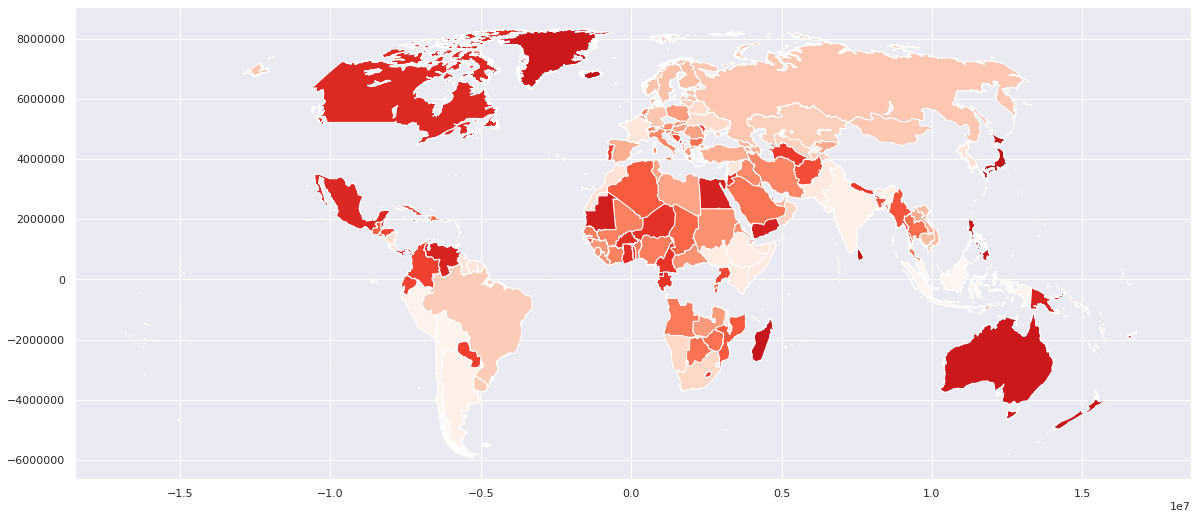

In [44]:
geo_map = geo_data.merge(last_rank, left_on='ADMIN', right_on='teams')
ax = geo_map.dropna().plot(cmap='Reds', figsize=(20,16), k=['teams','rank'], legend=True, column='rank', color='#fefefe')


In [45]:
data['total_score'] = data['away_score'] + data["home_score"]
total_score_sorted = data.sort_values(by=['total_score'], ascending=False)
total_score_sorted.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,timestamp,year,total_score
23781,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,9.869310e+08,2001,31
7893,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False,5.355540e+07,1971,30
10931,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False,3.048030e+08,1979,24
28815,2006-11-24,Sápmi,Monaco,21,1,Viva World Cup,Hyères,France,True,1.164314e+09,2006,22
23778,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,9.867582e+08,2001,22
27350,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Chinese Taipei,True,1.110487e+09,2005,21
25671,2003-06-30,Sark,Isle of Wight,0,20,Island Games,St. Martin,Guernsey,True,1.056915e+09,2003,20
35997,2014-06-01,Darfur,Padania,0,20,CONIFA World Football Cup,Östersund,Sweden,True,1.401565e+09,2014,20
14705,1987-12-15,American Samoa,Papua New Guinea,0,20,South Pacific Games,Nouméa,New Caledonia,True,5.665122e+08,1987,20
22552,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False,9.504738e+08,2000,20


In [46]:
ranking = pd.DataFrame(ranking)
ranking.describe()

,Scotland,England,Wales,Northern Ireland,United States,Canada,Uruguay,Argentina,Austria,Hungary,...,Cascadia,Matabeleland,Kabylia,Timor-Leste,Curacao,Myanmar,Parishes of Jersey,Chameria,Saint Helena,St Vincent and the Grenadines
count,41243.000000,41243.000000,41243.000000,41243.000000,41243.000000,41243.000000,41243.000000,41243.000000,41243.000000,41243.000000,...,41243.000000,41243.000000,41243.000000,41243.000000,41243.000000,41243.000000,41243.000000,41243.000000,41243.000000,41243.000000
mean,685.251474,701.511601,697.178246,659.411497,577.754606,508.297057,676.704606,697.666820,677.678350,674.641609,...,1.841126,2.848928,1.238079,16.048738,21.474775,22.340310,0.719893,1.807830,2.877467,5.189378
std,172.922235,176.809334,189.049578,190.030627,280.442986,286.217652,207.394475,205.005506,193.851539,189.608711,...,9.696922,15.090645,6.471899,88.854497,124.936028,131.386702,4.530531,14.621645,27.077653,61.244811
min,-1.000000,0.000000,0.000000,-2.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,...,-1.000000,-2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000
25%,587.319154,591.571340,589.139190,551.740070,370.773726,345.042967,538.992077,590.201098,602.458253,585.064844,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,686.539920,704.421512,689.281652,640.542150,666.176096,580.102595,700.283976,711.803736,712.184587,675.577244,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,833.209715,834.167113,870.759852,828.344886,810.607720,749.317292,823.062682,866.422543,765.576314,833.670295,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,982.242462,1016.301485,1010.420292,1031.495196,996.505467,932.813577,1041.237420,1024.634163,1020.708159,954.328182,...,56.640228,83.344693,55.689386,511.194859,894.664758,808.568440,30.999566,163.182065,258.530052,741.139402


In [47]:
ranking_stds = ranking.std().sort_values(ascending=False)
ranking_stds

Czech Republic            416.871015
Bosnia and Herzegovina    413.871821
North Macedonia           394.732765
Armenia                   393.563908
Slovenia                  393.372396
                             ...    
Niue                        0.923110
Palau                       0.902068
Asturias                    0.769560
Chagos Islands              0.449734
Madrid                      0.354624
Length: 314, dtype: float64

In [53]:
# پ گل ترین کشور ها
# max all time sort
# sort games
ranking.to_json(path_or_buf="all_ranking.json", orient= "records")

به طورر کلی برای اینکه بتونیم تحلیل درستی روی دیتا داشته باشیم و بتونیم به سوالات مسله پاسخ بدیم باید سیستمی بری رنک کرن تیم ها اراعه میدادیم 
این کار با چالش های بسیاری روبرو بود مثلا خیلی از تیم ها رفته رففته وارد مسابقات میشدند و دیتایی برای اون ها نداشتیم و اگر نمیخواستیم این مورد را بررسی کنیم انگلستان به عنووان کهن ترین تیم همیشه رنک شماره یک را به خود اختصاص میدادو هیچ روند مناسبی برای رنکینگ در طول تاریخ بدست نمیامد 
هدف کلی ما در این بخش این بود که بتوانیم رنکینیگی در هر برش از تاریخ فوتبال اراعه دهیم 
برای این کار از سیستم کلی شرط بندی الهام گرفتیم و روند فوق را اراعه دادیم 
و بعد از تعریف کلی این روند ها تنها چیزی که لازم بود تیون کردن پرامترهای الگوریتممون بود 

به طور کلی اگر دمسابقه ی فوتبالی برکزار شود هر دو تیم انتیازی که تا کنون در رنکین گ دارند رو وارد بازی میکنند 
اگر نتیجه ی هر دو تیم برابر میانگین هر دو امتیاز میشود اینطوری اکر ی تیم خیلی قوی با یک تیم خیلی ضعیف مسابقه دهد یعنی افتداشته و باید رنکش کم شود و تیم ضعیف عملکرد خوبی نسبت به کاری ک انجام داده داشته و امتیاز کسب میکند 
حال اگر مسابقه مساوی نشود 
	اگر تیم ضعیف برنده شده باشد امتیازش برابر تیم قوی تر میشود و درصدی از اختلاف تامتیاز هر ۲ تیم را میگیرد و تیم بازنده یک امتیاز از دست میدهد
	اگر تیم قوی تر برنده باشد امتیاز تیم قوی 6 واحد اضافه میشود و تیم بازنده یک واحد کم میشود 

این سیستم این مزیت را دارید که اگر تیمی ضعیف تیم قوی ای را ببرد که اختلاف امتیاز بالایی دارد این شانس را به تیم های ته جدول میدهد که بتواندد به صدر صعود کنند و تیم های صدر جدول همیشه یکه تاز نیستند 

حال اگر تیمی برای اولین بار وارد مسابقات شود هنگامی که اولین مسابقه که برنده شود طبق فرمول بالا امتیاز یگیرد و جایگاهش را در حدول کسب میکند
روند فوق را برای هررکورد اجرا کردیم و اینگونه رنکینگی در هر بازه تاریخ اراعه دادیم 

با این سیستم که ما اراعه دادیم اولا در حال حاضر نتایج سیستم رنکینگ ما با رنکینگ داغون فیفا برابر هست
و وقتی انیمیشن رو از روی این برش های تاریخی ساختیم تیم هایی که مغلوب بودن رو در بازه های مختلف تاریخ پپیدا میکنیم وقتی تیمی برای ۵ سال همیشه رنگ یک رو ب خودش اختصاص میده یعنی ددر ان ۵ سال دامینیتور بود و میتونیم عصر های فوتبال رو تریس کنیم 
مثلا دوره ای که پلله همچنان بازی میکرد همیشه ارژانتین بالاست و این نتیجه رو توی انیمیشن میشه کامل دید
